## Someone gave me a graph and the data, and told me make this

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

In [6]:
df = pd.read_csv("Liver enzymes.csv").T
df.columns = ['Enzyme_lvl']
rng1 = [i for i in range(9) if i%3 == 0]
rng2 = [i for i in range(9) if i%3 == 1]
rng3 = [i for i in range(9) if i%3 == 2]
rng_1 = [i for i in range(9,18) if i%3 == 0]
rng_2= [i for i in range(9,18) if i%3 == 1]
rng_3 = [i for i in range(9,18) if i%3 == 2]
c_AST = df.iloc[rng1]
c_ALT = df.iloc[rng2]
c_ALP = df.iloc[rng3]
np_AST = df.iloc[rng_1]
np_ALT = df.iloc[rng_2]
np_ALP = df.iloc[rng_3]
df

,Enzyme_lvl
Control-Mouse1-AST,278
Control-Mouse1-ALT,50
Control-Mouse1-ALP,316
Control-Mouse2-AST,218
Control-Mouse2-ALT,52
Control-Mouse2-ALP,537
Control-Mouse3-AST,243
Control-Mouse3-ALT,53
Control-Mouse3-ALP,293
Np-Mouse1-AST,169


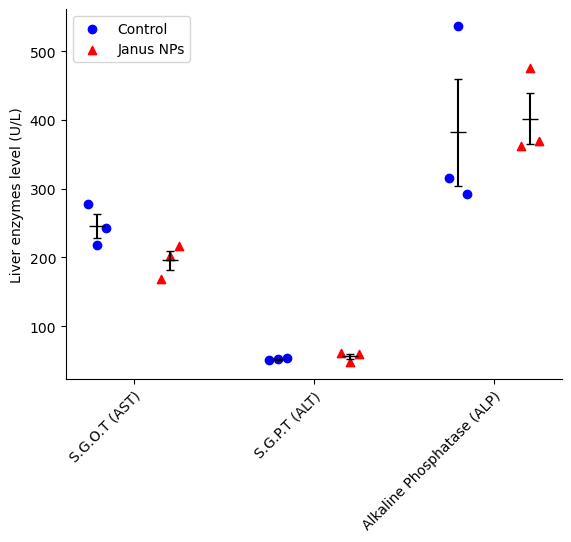

In [5]:
X1 = np.array([1,2,3,21,22,23,41,42,43])
X2 = np.array([9,10,11,29,30,31,49,50,51])
means = np.array([6, 26, 46])

y1 = np.vstack((c_AST.values, c_ALT.values, c_ALP.values)).reshape(-1,)
y2 = np.vstack((np_AST.values, np_ALT.values, np_ALP.values)).reshape(-1,)

xx = np.array([2,10,22,30, 42, 50])
yy = np.array([c_AST.values.mean(),np_AST.values.mean(), c_ALT.values.mean(),
               np_ALT.values.mean(), c_ALP.values.mean(), np_ALP.values.mean()])
error = np.array([sem(c_AST.values)[0], sem(np_AST.values)[0], sem(c_ALT.values)[0],
                  sem(np_ALT.values)[0], sem(c_ALP.values)[0], sem(np_ALP.values)[0]])

fig, ax = plt.subplots()
ax.scatter(X1,y1, marker='o', color = 'blue', label='Control')
ax.scatter(X2,y2, marker='^', color = 'red', label='Janus NPs')
ax.errorbar(xx, yy, error, linestyle='None', marker='_', color = 'k', markersize=12, capsize=3)

ax.set_xticks(means)
ax.set_xticklabels(['S.G.O.T (AST)', 'S.G.P.T (ALT)', 'Alkaline Phosphatase (ALP)'],
                    rotation=45, ha='right', rotation_mode='anchor')
ax.spines[['right', 'top']].set_visible(False)

ax.set_ylabel('Liver enzymes level (U/L)')
ax.legend()
plt.show()